In [1]:
import pandas as pd
import numpy as np
import importlib

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

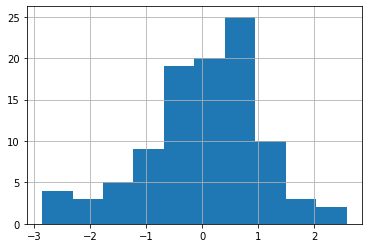

In [10]:
xx = X.hist()

In [14]:
xx.patches[0].get_height()

4.0

(array([43., 57.]),
 array([-2.87157421, -0.13189634,  2.60778154]),
 <BarContainer object of 2 artists>)

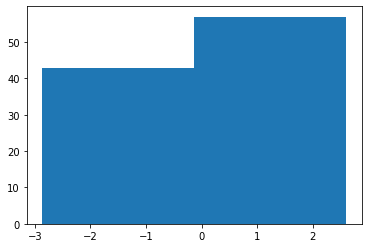

In [7]:
plt.hist(X, bins=2)

## Testing out table plots

In [12]:
?Rectangle

In [2]:
cell_colors = [['g','g'], ['r', 'r']]

In [37]:
f1 = plt.figure(num=333, figsize=(4,4))

<Figure size 288x288 with 0 Axes>

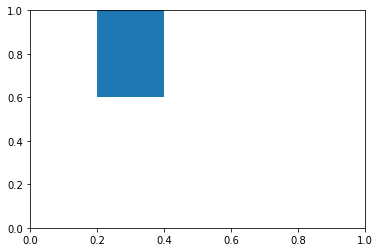

In [54]:
r1 = Rectangle((0.2,0.6), 0.2, 0.4)
ax = plt.gca()
ax.add_patch(r1)

In [57]:
ax.table?

In [24]:
ax.add_patch(r1)

In [21]:
plt.Rectangle((0.2, 0.6), 0.2, 0.4)

In [39]:
tmp = ax.get_celld()

In [47]:
tmp.values()

dict_values([<matplotlib.table.Cell object at 0x7ff1e7f997f0>, <matplotlib.table.Cell object at 0x7ff1e7f994f0>, <matplotlib.table.Cell object at 0x7ff1e7f99760>, <matplotlib.table.Cell object at 0x7ff1e7f99190>])

In [44]:
tmp[(0,0)].set_height(3)

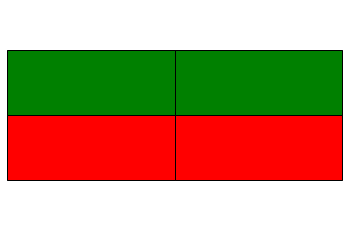

In [53]:
ax = plt.table(cellColours=cell_colors, loc='center', colWidths=[0.5, 0.5])
#plt.ylim(0.4, 0.6)
for cell in ax.get_celld().values():
    cell.set_height(0.3)
ax.axes.set_axis_off()


In [77]:
def test_table_plot():
    #ax = plt.gca()
    #plt.gca()
    ax2 = plt.table(cellColours=cell_colors, loc='center', colWidths=[0.5, 0.5])

    #ax2 = ax.table(cellColours=cell_colors, loc='center', colWidths=[0.5, 0.5])

    for cell in ax2.get_celld().values():
        cell.set_height(0.3)
    ax2.axes.set_axis_off()
    return(ax2)

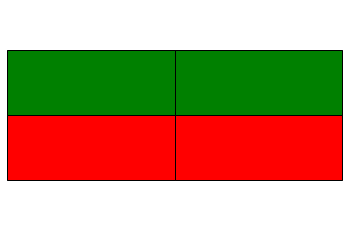

In [78]:
test_table_plot()

In [51]:
ax.axes.set_axis_off?

In [28]:
def df_plot(pandas_df):
    # get shape
    df_shape = pandas_df.shape
    
    cell_colours = np.empty(df_shape, dtype=np.object)
    cell_colours[:] = 'xkcd:lightblue'
    
    #ax = plt.gca()
    #plt.gca()
    ax2 = plt.table(cellColours=cell_colours, loc='center')

    #ax2 = ax.table(cellColours=cell_colors, loc='center', colWidths=[0.5, 0.5])

    for cell in ax2.get_celld().values():
        cell.set_height(1.0/df_shape[0])
    ax2.axes.set_axis_off()
    return(ax2)

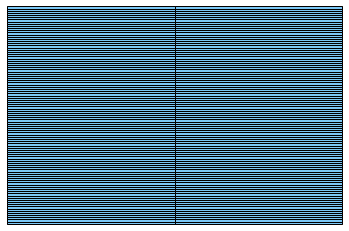

In [37]:
mt.df_plot(x_df)

In [14]:
xxx = np.array(['dfs', 'dfs'], dtype=np.object)

In [24]:
xxx[:] = 'test'

In [23]:
xxx = np.empty((2,3), dtype=np.object)

In [25]:
xxx

array([['test', 'test', 'test'],
       ['test', 'test', 'test']], dtype=object)

## Testing mt class

In [2]:
import mtjjv as mt

Create a data frame to test on.

In [13]:
x_df = pd.DataFrame({"x": np.random.randn(10), "y": np.random.randn(10)})

x_df.head()

,x,y
0,1.193671,-0.179272
1,-0.060827,0.694660
2,1.074681,0.050026
3,0.383086,-0.016420
4,2.451393,0.323145


In [11]:
importlib.reload(mt)

<module 'mtjjv' from '/home/viknesh/NUS/artificalData/artificial-dataset-generation/mtjjv.py'>

Create another df if necessary.

In [12]:
x1 = np.random.exponential(size=10)
x2 = np.random.chisquare(23, size=10)

X_df = pd.DataFrame({'x1':x1, 'x2':x2})

### Partial function

In [16]:
d1 = mt.DirtyDataFrame(x_df)
d1.attach_stainer(mt.add_duplicates, new_index='keep')

In [17]:
d1.stainer_list[0]

functools.partial(<function add_duplicates at 0x7f15d7478670>, new_index='keep')

Contains repeated indices.

In [18]:
d1.stainer_list[0](x_df)

,x,y
0,1.193671,-0.179272
1,-0.060827,0.694660
1,-0.060827,0.694660
2,1.074681,0.050026
3,0.383086,-0.016420
4,2.451393,0.323145
5,1.156973,0.986589
6,-0.564326,0.258205
7,1.139394,-0.023609
8,0.373979,1.027058


In [20]:
d2 = mt.DirtyDataFrame(x_df)
d2.attach_stainer(mt.add_duplicates, row_to_dup=3, new_index='keep')

In [21]:
d2.stainer_list[0]

functools.partial(<function add_duplicates at 0x7f15d7478670>, row_to_dup=3, new_index='keep')

Contains repeated indices.

Always duplicates row id 3, and keeps the duplicate row indexes.

In [26]:
d2.stainer_list[0](x_df)

,x,y
0,1.193671,-0.179272
1,-0.060827,0.694660
2,1.074681,0.050026
3,0.383086,-0.016420
3,0.383086,-0.016420
4,2.451393,0.323145
5,1.156973,0.986589
6,-0.564326,0.258205
7,1.139394,-0.023609
8,0.373979,1.027058


---

In [108]:
f = mt.add_duplicates

In [109]:
from functools import partial

In [118]:
tmp = {'new_index':'reindex'}

In [119]:
f2 = partial(f, **tmp)

In [121]:
f2(X_df)

,x1,x2
0,1.391365,35.167426
1,0.973908,20.935038
2,0.178342,19.047673
3,1.035230,26.748522
4,0.494711,29.367514
5,0.994164,32.960705
6,0.468626,26.143016
7,0.010177,23.177785
8,0.129874,16.882969
9,0.623237,31.082103


In [115]:
?partial

In [107]:
import partial

ModuleNotFoundError: No module named 'partial'

In [103]:
X_df.shape[1]

2

In [45]:
row_to_add = X_df.sample(n=1)

In [59]:
X_df.iloc[[row_to_add.index[0]]]

,x1,x2
1,0.973908,20.935038


In [66]:
2 is 3

<>:1: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:1: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-66-0f0b1d4720d3>:1: SyntaxWarning: "is" with a literal. Did you mean "=="?
  2 is 3


False

In [67]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [57]:
pd.concat([X_df.iloc[:row_to_add.index[0], :], row_to_add, X_df.iloc[row_to_add.index[0]:, :]])

,x1,x2
0,1.391365,35.167426
1,0.973908,20.935038
1,0.973908,20.935038
2,0.178342,19.047673
3,1.035230,26.748522
4,0.494711,29.367514
5,0.994164,32.960705
6,0.468626,26.143016
7,0.010177,23.177785
8,0.129874,16.882969
